# 1. Clustering metrics
*Tham khảo: [Scikit-Learn - Clustering evaluation performance](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)*

## 1.1. Định dạng chung của bài toán
Bài toán clustering không cần nhãn mà tự khám phá ra các cụm ẩn bên trong dữ liệu. Việc định nghĩa thế nào là một cụm tuỳ vào từng thuật toán, nhưng đều có đặc điểm chung là các cụm đều có tính chất *disjoint*, tức không có bản ghi nào thuộc 2 cụm.

feature1|feature2|feature3|feature4|cluster
:-:|:-:|:-:|:-:|:-:|
21|0.82|X|0|$C_1$
12|0.14|Z|1|$C_1$
19|0.27|X|0|$C_2$
9|0.35|Y|1|$C_2$
14|0.21|Z|0|$C_2$
16|0.43|Y|0|$C_3$
20|0.27|Z|1|$C_3$

## 1.2. Metrics
Với $n=1,2,\dots,N$ và $k=1,2,\dots,K$, các ký hiệu sau dùng chung cho tất cả các metric:
- $N$ là số bản ghi
- $K$ là số cụm
- $\mathbf{o}_n$ là một điểm dữ liệu hay một bản ghi
- $C_k$ cụm thứ k, kích thước của cụm này là $|C_k|$ và có *centroid* (tâm cụm) là vector $\mathbf{c}_k$

### Silhouette coefficient
[Hệ số Silhouette](https://en.wikipedia.org/wiki/Silhouette_(clustering)) của một mô hình phân cụm là trung bình giá trị Silhouette của từng điểm dữ liệu.

$$\mathrm{SC}=\frac{1}{N}\sum_{n=1}^{N}{\frac{b_n-a_n}{max\{a_n,b_n\}}}$$

Giả sử một điểm dữ liệu $\mathbf{o}_n$ thuộc cụm $A$, và cụm gần nhất với $A$ là $B$ (xác định bởi khoảng cách giữa 2 centroid). Các giá trị $a_n$ và $b_n$ được tính như sau:
- $\displaystyle{a_n=\frac{1}{|A|-1}}\sum_{\mathbf{o}_i\in A}{d(\mathbf{o}_n,\mathbf{o}_i)}$ là khoảng cách trung bình từ $\mathbf{o}_n$ đến mọi điểm dữ liệu khác trong cụm $A$.
- $\displaystyle{b_n=\frac{1}{|B|}\sum_{\mathbf{o}_i\in B}{d(\mathbf{o}_n,\mathbf{o}_i)}}$ là khoảng cách trung bình từ $\mathbf{o}_i$ đến mọi điểm dữ liệu trong cụm $B$.

Công thức tính hệ số Silhouette trả về một giá trị nằm trong khoảng $[-1,1]$. Ý tưởng của Silhouette dựa trên mục đích, khoảng cách giữa các điểm trong cùng một cụm phải đủ nhỏ, còn khoảng cách từ cụm này đến cụm kia phải đủ lớn. Nếu trạng thái lý tưởng trên đạt được, khi đó $a_n\ll b_n$ dẫn đến $b_n-a_n\approx b_n$ và $max\{a_n,b_n\}=b_n$, như vậy giá trị Silhouette gần bằng 1. Xét trên quy mô toàn bộ tập dữ liệu, nếu Silhouette càng gần với 1 thì các cụm càng phân định rõ ràng với nhau.

### Calinski-Harabasz Index
Hệ số Calinski-Harabasz được tính theo công thức:

$$\mathrm{CHI}=\frac{\mbox{SS}_B}{\mbox{SS}_W}\cdot\frac{N-K}{K-1}$$

Trong đó:
- $\displaystyle{\mbox{SS}_B=\sum_{k=1}^K\|\mathbf{c}_k-\bar{\mathbf{o}}\|^2}$ là *Between-cluster Sum of Squared distance*. Được tính bằng tổng khoảng cách từ từng centroid của $K$ cụm đến centroid của toàn tập dữ liệu.

- $\displaystyle{\mbox{SS}_W=\sum_{k=1}^{K}\sum_{\mathbf{o}_n\in C_k}\|\mathbf{o}_n-\mathbf{c}_k\|^2}$ là tổng của *Within-cluster Sum of Squared distance*. $\mbox{SS}_W$ của mỗi cụm là tổng khoảng cách từ từng điểm dữ liệu trong một cụm đến tâm cụm đó.

$\mbox{SS}_B$ càng lớn chứng tỏ các cụm càng cách xa nhau, trong khi $\mbox{SS}_W$ càng nhỏ thì độ phân tán của cụm càng thấp. Như vậy chỉ số Calinski-Harabasz Index càng cao càng thể hiện phân cụm tốt.

### Davies-Bouldin Index
Các bước tính chỉ số Davies-Bouldin Index như sau:

- B1: Với mỗi cụm $C_k$, tính độ phân tán $s_k$ cho cụm $C_k$ bằng việc trung bình khoảng cách (Euclidean) từ mỗi điểm dữ liệu của cụm $C_k$ đến centroid của cụm này $\mathbf{c}_k$. Nếu $s_k$ thì các điểm điểm trong cụm $C_k$ rất gần với centroid.
- B2: Với mỗi cụm $C_k$, tính một chỉ số $D_k$.
     - Với mỗi cụm $C_i$ khác $C_k$, tính khoảng cách $d_{ki}$ giữa 2 centroid, $\mathbf{c}_k$ and $\mathbf{c}_i$. Nếu giá trị $d_{ki}$ chứng tỏ 2 cụm $C_i$ và $C_k$ cách xa nhau.
     - Xây dựng công thức $\displaystyle{R_{ki}=\frac{s_k+s_i}{d_{ki}}}$ thể hiện chất lượng mối quan hệ giữa $C_i$ và $C_k$. $R_{ki}$ càng nhỏ càng tốt.
     - Lựa chọn $\displaystyle{D_k=\max_{i}{R_{ki}}}$ là trường hợp xấu nhất trong tất cả các giá trị $R_{ki}$.
- B3: Tính chỉ số Davies-Bouldin Index cho toàn bộ mô hình. Giá trị của chỉ số DBI càng nhỏ càng tốt.
$$\mathrm{DBI}=\frac{1}{k}\sum_{i=1}^{k}{D_k}$$

## 1.3. Thực thi

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()
X = iris.data
label = iris.target

In [17]:
silhouette_score(X, label)

0.5034774406932957

In [18]:
davies_bouldin_score(X, label)

0.7513707094756749

In [19]:
calinski_harabasz_score(X, label)

487.33087637489984

# 2. k-Means

## 2.1. Thuật toán
Cho một dataset có $N$ điểm dữ liệu $(\mathbf{o}_1,\mathbf{o}_2,\dots,\mathbf{o}_N)$, thuật toán [$k$-Means algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-means) được mô tả như sau:

- B1: Khởi tạo $K$ centroid bằng việc chọn ngẫu nhiên $K$ điểm dữ liệu.
- B2: Gán mỗi điểm dữ liệu vào cụm có centroid gần nó nhất.
- B3: Cập nhật centroid mới cho mỗi cụm là trung bình toạ độ của tất cả các điểm trong cụm đó. Việc làm này sẽ làm tối thiếu hoá giá trị *inertia*, tính bằng tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến centroid tương ứng.
- B4: Lặp lại B2 và B3 đến khi đạt một điều kiện dừng, thường là số vòng lặp tối đa hoặc một ngưỡng mà inertia giảm tối thiểu.

<img src='image/k_means.gif' style='height:400px; margin:0 auto 20px;'>

## 2.2. Thực thi
Một số hyperparameters đáng chú ý trong [$k$-Means implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):

Hyperparameter|Meaning|Default value|Common values|
:---|:---|:---|:---|
`n_clusters`|Số cụm|`8`||
`n_init`|Số lần khởi tạo tâm cụm|`10`||
`max_iter`|Số vòng lặp tối đa trong 1 lần chạy|`300`||

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
df = pd.read_csv('data/mall_customers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['annual_income','spending_score']]

In [4]:
km = KMeans(n_clusters=5)
label = km.fit_predict(X)
result = X.assign(label=label)
result.head()

,annual_income,spending_score,label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [5]:
silhouette_score(X, label)

0.553931997444648

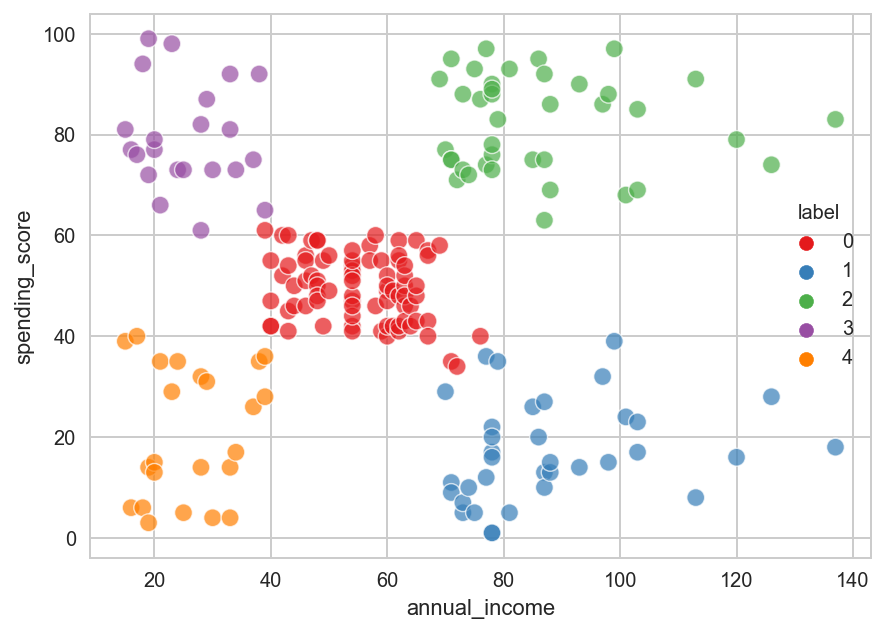

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=result, x='annual_income', y='spending_score', hue='label', palette='Set1', alpha=.7, s=80)
plt.show()

### Cách xác định số cụm cần chia

Phương pháp Elbow method (chính là grid search) là một biểu đồ biểu diễn metric đánh giá của model ứng với mỗi giá trị của $k$.
Tuy nhiên, một số độ đo hiệu quả của model là hàm đồng biến với $k$, vì vậy nếu chọn $k$ tại điểm có metric rất tốt có thể dẫn tới hiện tượng mỗi cụm chỉ chứa 1 điểm duy nhất. Trong trường hợp như vậy, chúng ta nên chọn $k$ tại điểm mà metric của model ko còn thay đổi mạnh nữa.

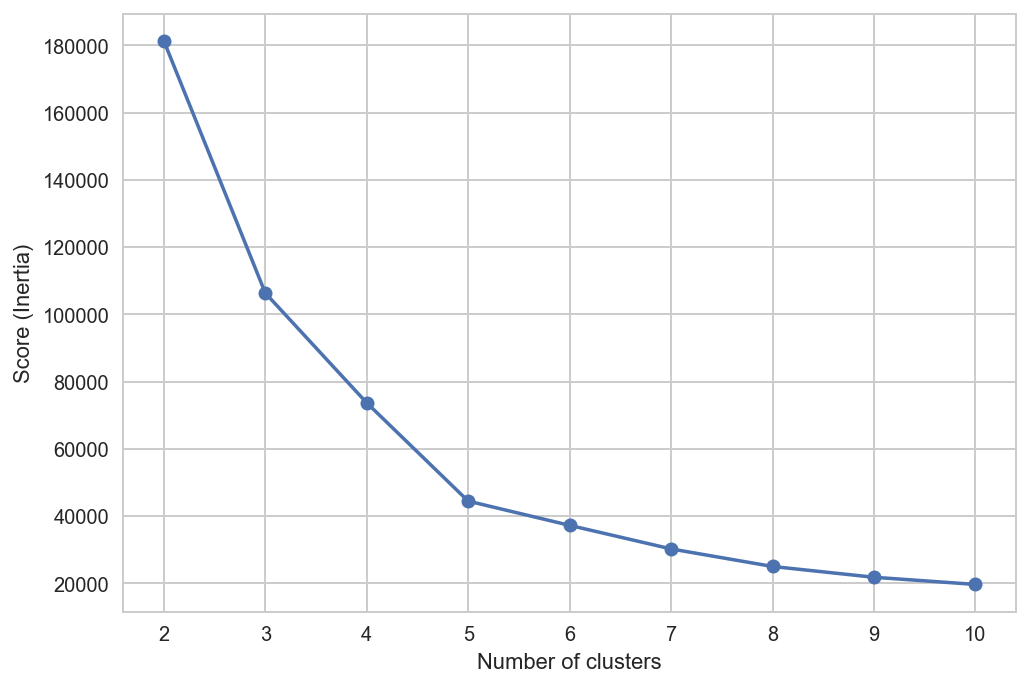

In [7]:
ks = range(2, 11)
scores = [KMeans(n_clusters=k).fit(X).inertia_ for k in ks]

plt.plot(ks, scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score (Inertia)')
plt.show()

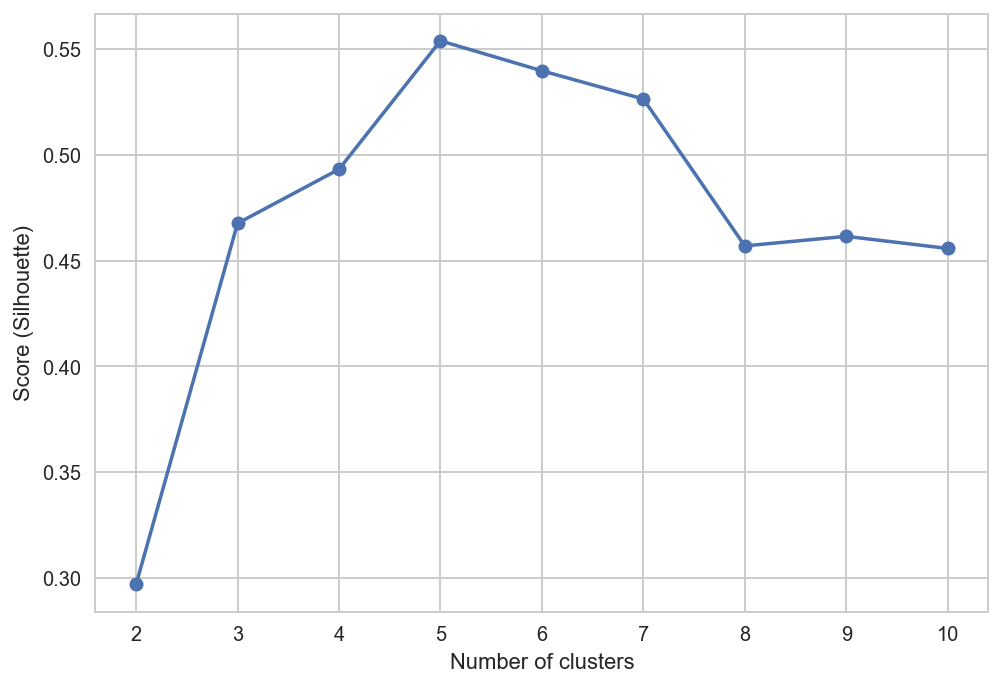

In [8]:
ks = range(2, 11)
scores = []
for k in ks:
    km = KMeans(n_clusters=k)
    label = km.fit_predict(X)
    score = silhouette_score(X, label)
    scores.append(score)

plt.plot(ks, scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score (Silhouette)')
plt.show()

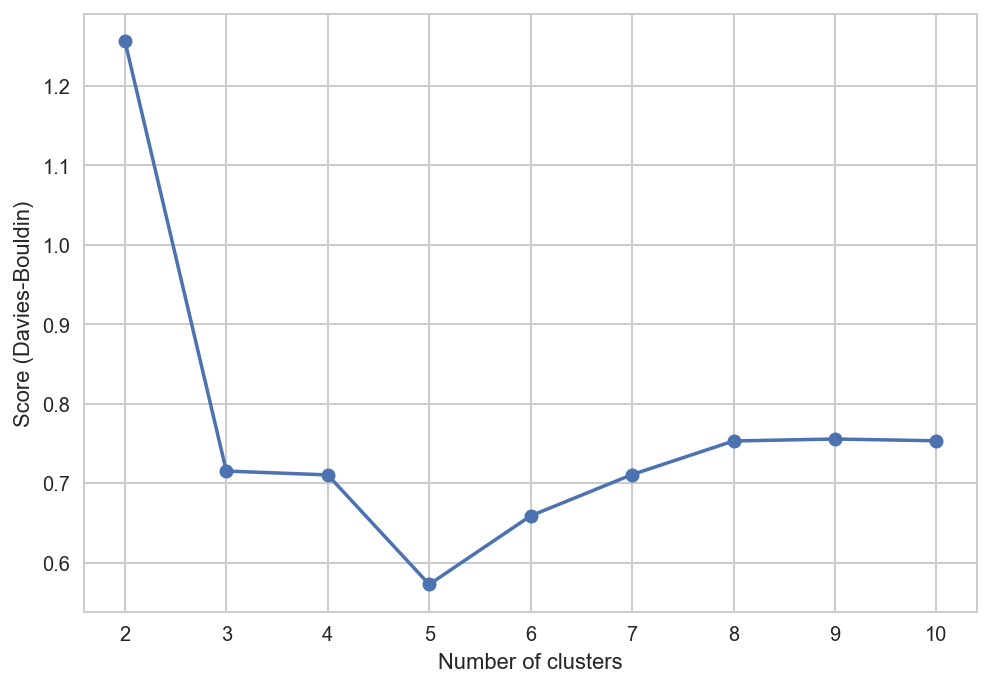

In [9]:
ks = range(2, 11)
scores = []
for k in ks:
    km = KMeans(n_clusters=k)
    label = km.fit_predict(X)
    score = davies_bouldin_score(X, label)
    scores.append(score)

plt.plot(ks, scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score (Davies-Bouldin)')
plt.show()

# 3. Mean Shift

## 3.1. Thuật toán.
[Mean Shift](https://scikit-learn.org/stable/modules/clustering.html#mean-shift) là một thuật toán non-parametric, dựa trên hàm mật độ Kernel Density Estimation. Ý tưởng của Mean Shift là đặt 1 kernel phân phối chuẩn tại mỗi điểm dữ liệu và cộng chúng lại với nhau. Quá trình này sẽ tìm được điểm gần với điểm cực đại nhất (*local maxima*), mỗi điểm tượng trưng cho một khu vực có mật độ cao và điểm đó sẽ trở thành tâm cụm. Hàm mật độ được sử dụng có dạng:

$$K(x) = \frac{1}{h\sqrt{2\pi}}\cdot\exp{\left(-\frac{\parallel x-x_i\parallel_2^2}{h^2}\right)}$$

Mean Shift không yêu cầu chúng ta phải chọn số cụm tuy nhiên chúng ta cần ước lượng giá trị của bandwidth $h$. Nếu giá trị này quá bé thì khả năng cao mỗi điểm sẽ là 1 cụm, còn nếu giá trị này quá lớn thì mọi điểm dữ liệu sẽ rơi vào cùng 1 cụm.

### The iterative method

Thuật toán tìm điểm *local maxima* của KDE được gọi là *mean-shift iteration*, thuật toán sẽ chạy trên các điểm random bên trong *convex hull* của dataset. Mục đích của phương pháp là dịch chuyển những điểm random này tới khu vực có mật độ dữ liệu cao nhất. Đối với mỗi điểm $\mathbf{o}$, thuật toán thực thi theo các bước sau:
- Bước 1: Tạo một cửa sổ hình tròn tại điểm $\mathbf{o}$ với bán kính $h$
- Bước 2: Tại mỗi vòng lặp, di chuyển trung tâm của hình tròn tới điểm trung bình của mọi điểm bên trong hình tròn đó. Đây chính là bước di chuyển trung tâm cụm đến vị trí có mật độ tập trung dữ liệu cao.
- Bước 3: Lặp lại bước 1 và 2 đến khi trung tâm cụm không còn di chuyển nữa.

Dưới đây là hình động mô tả cách mean shift hoạt động:


<img src='image/mean_shift.gif' style='height:300px; margin:0 auto 20px;'>

## 3.2. Thực thi
[Mean-Shift implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html).

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [11]:
df = pd.read_csv('data/mall_customers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
X = df[['annual_income','spending_score']]

In [13]:
ms = MeanShift(bandwidth=25)
label = ms.fit_predict(X)
result = X.assign(label=label)
result.head()

,annual_income,spending_score,label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


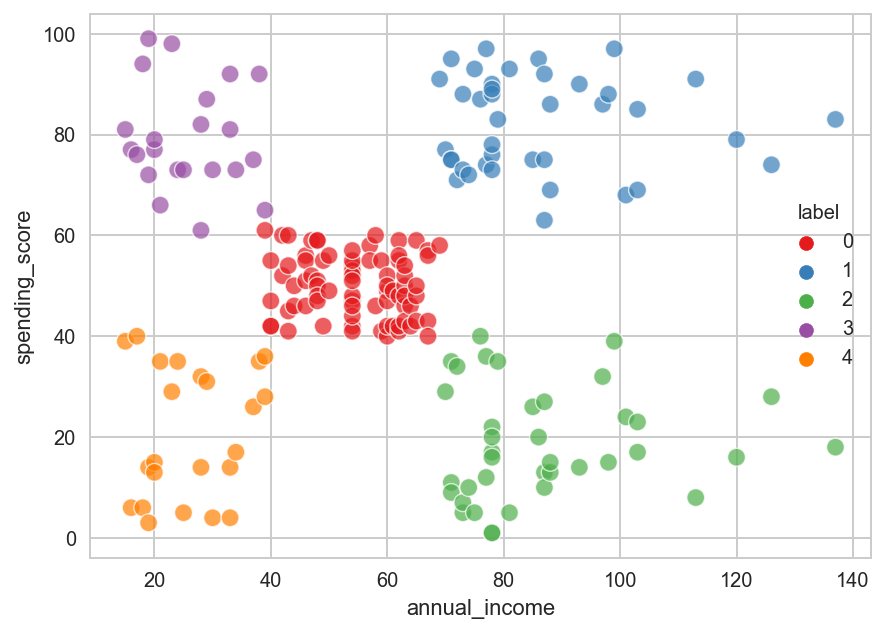

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=result, x='annual_income', y='spending_score', hue='label', palette='Set1', alpha=.7, s=80)
plt.show()

### Ước lượng bandwidth

Scikit-Learn cung cấp hàm `estimate_bandwith` trả ra giá trị bandwidth phù hợp nhất cho tập dữ liệu. Cho $n$ điểm dữ liệu $\mathbf{o}_1,\mathbf{o}_2,\dots,\mathbf{o}_n$ và một giá trị phân vị $q$, $q\in(0,1]$. Giá trị của bandwidth được tính bằng cách lấy trung bình khoảng cách giữa mỗi điểm và điểm xa nó nhất trong phạm vi $\lfloor nq\rfloor$ điểm gần nhất.

Phương pháp ước lượng này cho phép chúng ta không quá phụ thuộc vào việc tuning hyperparameter, vì giá trị của phân vị thường nằm trong khoảng $q\in(0.1, 0.3)$. Tuy nhiên, tìm những điểm láng giềng cho mọi điểm dữ liệu sẽ mất nhiều thời gian và bộ nhớ để tính toán, vì vậy phương pháp này không phù hợp với dữ liệu quá lớn. Khi tập dữ liệu quá lớn, nên set thêm tham số `n_samples` để giảm số lượng của tập dữ liệu.


In [15]:
estimate_bandwidth(X, quantile=0.17)

24.342868108278907

# 4. DBSCAN (Optional)

## 4.1. Thuật toán

[DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)- viết tắt của Density-Based Spatial Clustering of Applications with Noises, là một thuật toán phân cụm có khả năng xác định được dữ liệu nhiễu và khả năng phân cụm đối với cả những cụm không lồi (non-convex). Chọn trước 2 giá trị: Giá trị khoảng cách nhỏ nhất $\epsilon$ và số điểm tối thiểu trong cụm, thuật toán chia các điểm thành 3 nhóm:
- Các điểm lõi (Core point): Một điểm có đủ các điểm lân cận trong 1 bán kính xác định
- Các điểm biên (edge point): Một điểm không đủ điều kiện để làm điểm lõi, nhưng là điểm lân cận của một core point khác.
- Các điểm nhiễu (outliers): Không là điểm core cũng không là điểm edge.

DBSCAN được mô tả theo các bước dưới đây
- Bước 1: Bắt đầu với một điểm dữ liệu bất kì, nếu có ít nhất một số điểm nằm trong bán kính $\epsilon$ , điểm này sẽ được đánh dấu là 1 điểm core và bắt đầu tạo cụm với các điểm láng giềng gần đó. Nếu không nó sẽ được đánh dấu là outlier
- Bước 2: Xác định mỗi điểm láng giềng của điểm core là điểm core hay edge. Nếu nó là một điểm core, lặp lại bước 1 và tiếp tục mở rộng cụm hiện tại.
- Bước 3: Lặp lại bước 1 và 2 đến khi mọi điểm trong cụm đều được xác định. Kết thúc cụm.
- Bước 4: Lại tiếp tục chọn random một điểm dữ liệu bất kì chưa được phân cụm, lặp lại bước 1,2 và 3 đến khi mọi điểm dữ liệu đều đã được đánh dấu. Đến cuối cùng, mỗi điểm sẽ thuộc 1 cụm hoặc là outlier.


<img src='image/dbscan.gif' style='height:300px; margin:0 auto 20px;'>

## 5.2. Thực thi
[DBSCAN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [23]:
df = pd.read_csv('data/mall_customers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
X = df[['annual_income','spending_score']]

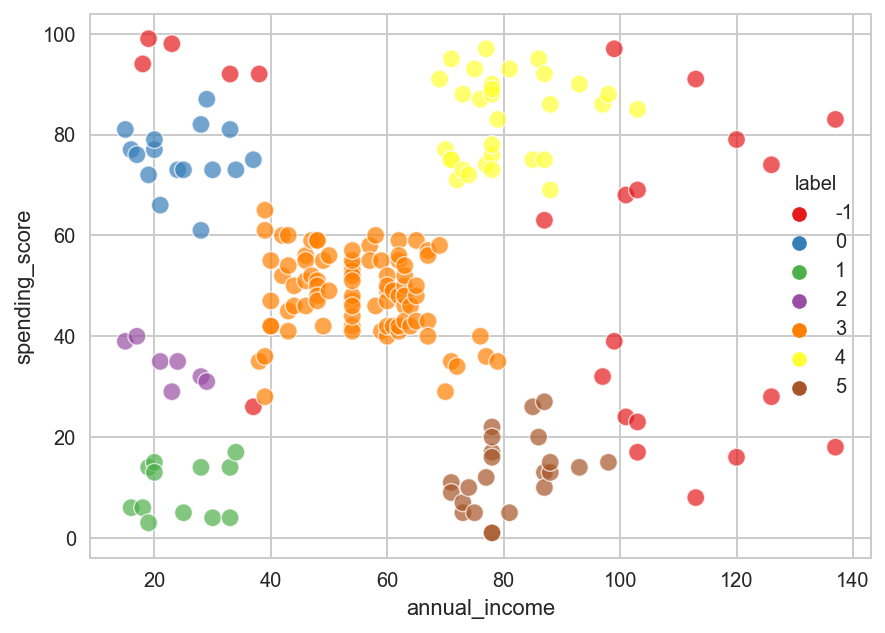

In [25]:
dbscan = DBSCAN(eps=9, min_samples=5)
label = dbscan.fit_predict(X)
result = X.assign(label=label)
# result.head()

plt.figure(figsize=(7,5))
sns.scatterplot(data=result, x='annual_income', y='spending_score', hue='label', palette='Set1', alpha=.7, s=80)
plt.show()